In [1]:
#DESCRIPTION: SENTIMENT ANALYSIS IS THE  PROCESS OF COMPUTATIONALITY DETERMINING WHWTHER THE PIECE OF WRITING IS POSITIVE , NEGATIVE OR NEUTRAL.
#IT IS ALSO CALLED OPINION MINING , DERIVING THE OPINION ATTITUDE OF A SPEAKER

In [2]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv(r"C:\Users\kalya\OneDrive\Desktop\Task2-Sentiment_Analysis\Task2-Amazon_Reviews.csv")

In [4]:
df.head(20)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [5]:
df.tail(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po..."
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A..."
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...
568447,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex..."
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [6]:
df.shape

(568454, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
#I PREFER RANDOM DATA THATS WHY GOING FOR SAMPLE() INSTEAD OF HEAD()

In [9]:
df.sample(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
272011,272012,B001EPPEGU,A1QEN7JPC06P81,Bushwhacker,0,0,5,1328054400,Lucky Country Licorice rocks!,"Lucky Country Licorice, Black, is the most lik..."
29459,29460,B000PDY3P0,A1V6MXRRXYSJPC,Bob,0,0,4,1303430400,Tastes like popcorn,This product tastes like movie style popcorn t...


In [10]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [11]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [12]:
#CHECKING FOR NULL VALUES

In [13]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

<AxesSubplot:>

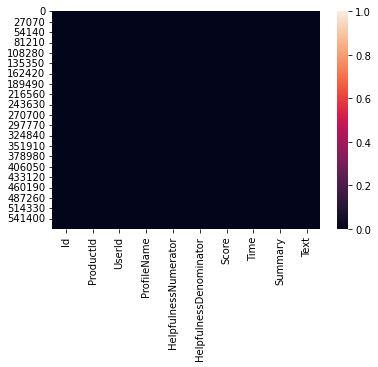

In [14]:
sns.heatmap(df.isnull())

In [15]:
#DUPLICATED RECORDS

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [18]:
#TEXT PREPROCESSING

In [19]:
#TEXTBLOB IS BUILT UPON AND PROVIDES AN EASY TO USE INTERFACE TO THE NLTK LIBRARY.
#VARIOUS TASKS CAN BE PERFORMED LIKE PART OF SPEECH TAGGING , NOUN PHRASE EXTRACTION , SENTIMENT ANALYSIS , TRANSLATIONS AND MORE

In [20]:
from nltk.corpus import stopwords
from textblob import TextBlob 

In [21]:
#LOWER CASING AND REMOVING PUNCTUATIONS 

In [22]:
df['Text'] = df['Text'].apply(lambda x: " ". join(x.lower() for x in x.split()))

In [23]:
df['Text'] = df['Text'].str.replace('[^\w\s]', "")
df.Text.head(5)

C:\Users\kalya\AppData\Local\Temp\ipykernel_6924\907301202.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', "")


0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

In [24]:
#pre processing :lower case, remove stopwords and punctuations

In [25]:
#syntax : string.replace(old, new, count)

In [26]:
print("yoo the food was delicious")

yoo the food was delicious


In [27]:
#LOOK AT THE SUMMARY TEXT USING WORDCLOUD

In [28]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [29]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [30]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

<AxesSubplot:xlabel='Score', ylabel='count'>

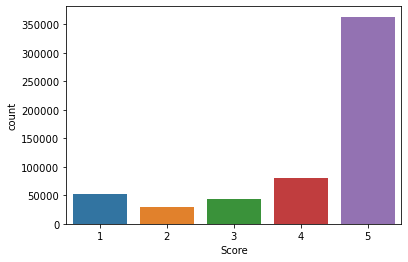

In [31]:
sns.countplot(data= df, x ='Score')

In [32]:
#CREATE A NEW DATA FRAME "REVIEWS" TO PERFORM EXPLORATORY DATA ANALYSIS UPON THAT
reviews = df
#DROPPING NULL VALUES
reviews.dropna(inplace=True)

In [33]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]


In [34]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

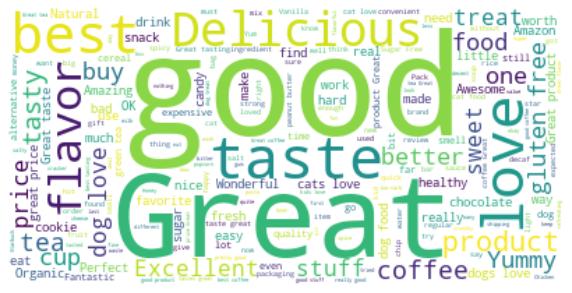

In [35]:
#WORDCLOUD FUCTION INPUT NEEDS TO BE SINGLE STRING OF TEXT.
#CONCATENATION ALL SUMMARIES INTO A SINGLE STRING 
#SIMILARITY YOU CAN BUILD FOR TEXT COLUMN

reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [36]:
#NOW LETS SPLIT THE DATA INTO NEGATIVE(SCORE IS 1 OR 2) AND POSITIVE (4OR 5)REVIEWS
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])]

#TRANSFORM TO SINGLE STRING

negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()


In [37]:
#CREATE WORDCLOUD

In [38]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace =True)

Text(0.5, 1.0, 'Reviews with Negative Score')

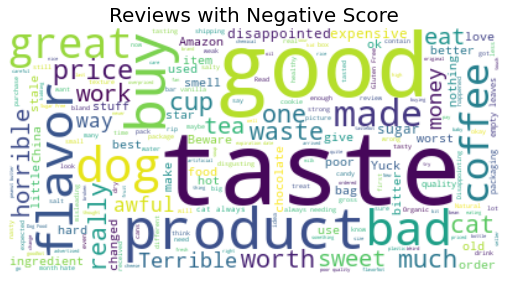

In [39]:

wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)

#plot

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation ='bilinear')
ax1.axis('off')
ax1.set_title('Reviews with Negative Score',fontsize=20)

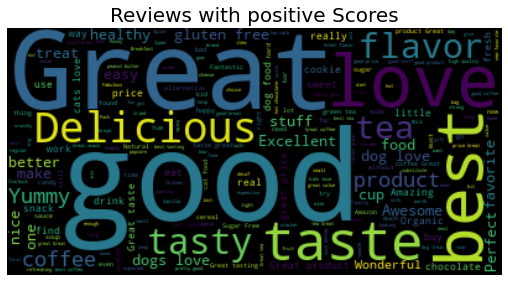

In [40]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation ='bilinear')
ax2.axis('off')
ax2.set_title('Reviews with positive Scores',fontsize=20)
plt.show()